# Outlier and influential observation sensitive analysis

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import pickle

from util import save_model, summarize_results, \
    tunning_negative_binomial_model, outlier_analysis

## Loading data

In [9]:
df_variables = pd.read_csv('data/output/df_without_collinearity_standardized.csv', index_col=0)

In [10]:
df_y = pd.read_csv('data/output/df_mortality.csv', index_col=0)

In [11]:
list_population =  df_y['population']
list_offset = np.log(list_population)

In [12]:
df_cluster_labels = pd.read_csv('data/output/df_labeled_cluster.csv', index_col=0)[['cluster_label']].copy()
custom_order = pd.CategoricalDtype(
    categories=[
        'Urbanized',
        'Urbanized with informal settlements',        
        'Semi-urbanized',
        'Rural with high human development',
        'Rural with low human development'
    ],
    ordered=True
)
df_cluster_labels['cluster_label'] = df_cluster_labels['cluster_label'].astype(custom_order)
df_cluster_labels = df_cluster_labels.sort_values('cluster_label') 

In [13]:
df_cluster_probabilities = pd.read_csv('data/output/df_standardized_pca_all_spherical_5_probability.csv', index_col=0)
df_cluster_probabilities.columns = ['Semi-urbanized', 'Rural with high human development', 'Urbanized with informal settlements', 'Rural with low human development', 'Urbanized']

## Outlier and influential observation sensitivity Analysis


*** Period:  2020_1
\*** Model 5
===>Full model:
                           Generalized Linear Model Regression Results                            
Dep. Variable:     deaths_accumulated_first_semester_2020   No. Observations:                 5560
Model:                                                GLM   Df Residuals:                     5538
Model Family:                            NegativeBinomial   Df Model:                           21
Link Function:                                        Log   Scale:                          1.0000
Method:                                              IRLS   Log-Likelihood:                -9113.1
Date:                                    Tue, 18 Jun 2024   Deviance:                       4546.0
Time:                                            23:51:45   Pearson chi2:                 5.72e+03
No. Iterations:                                       100   Pseudo R-squ. (CS):             0.6496
Covariance Type:                                nonrobust  

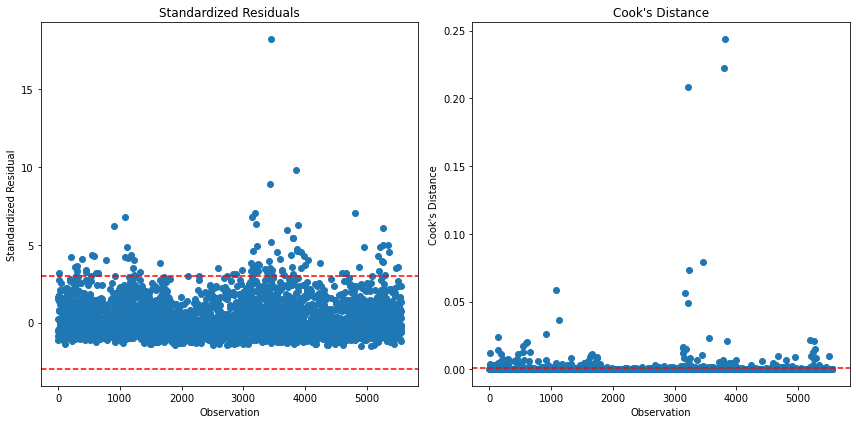

Quantity outliers (Standardized Residuals > 3): 96
Quantity influential Points (Cook's Distance > 4/n): 297
Selected alpha: 0.26
                           Generalized Linear Model Regression Results                            
Dep. Variable:     deaths_accumulated_first_semester_2020   No. Observations:                 5253
Model:                                                GLM   Df Residuals:                     5231
Model Family:                            NegativeBinomial   Df Model:                           21
Link Function:                                        Log   Scale:                          1.0000
Method:                                              IRLS   Log-Likelihood:                -7503.8
Date:                                    Tue, 18 Jun 2024   Deviance:                       3930.8
Time:                                            23:56:07   Pearson chi2:                 4.02e+03
No. Iterations:                                       100   Pseudo R-squ. (CS):

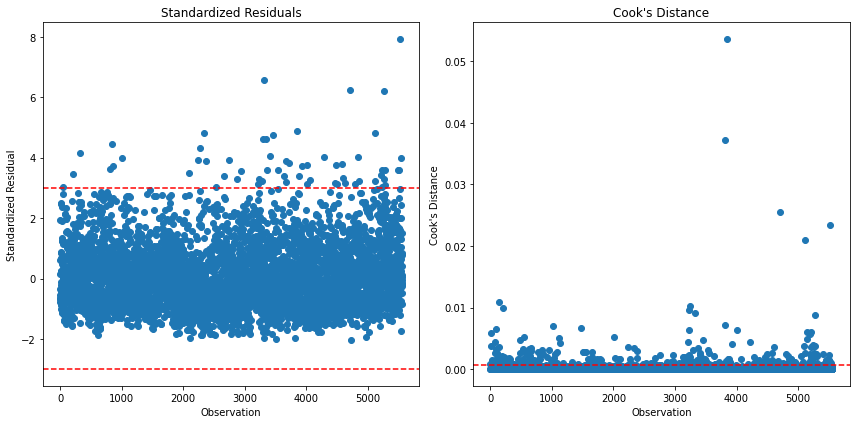

Quantity outliers (Standardized Residuals > 3): 61
Quantity influential Points (Cook's Distance > 4/n): 286
Selected alpha: 0.09999999999999999
                    Generalized Linear Model Regression Results                    
Dep. Variable:     deaths_accumulated_2020   No. Observations:                 5271
Model:                                 GLM   Df Residuals:                     5249
Model Family:             NegativeBinomial   Df Model:                           21
Link Function:                         Log   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -14012.
Date:                     Wed, 19 Jun 2024   Deviance:                       5317.3
Time:                             00:00:25   Pearson chi2:                 5.02e+03
No. Iterations:                        100   Pseudo R-squ. (CS):             0.5209
Covariance Type:                 nonrobust                                         
                

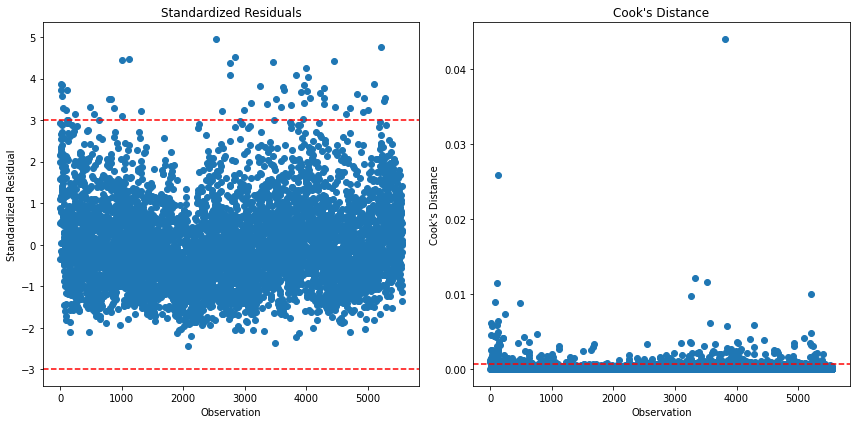

Quantity outliers (Standardized Residuals > 3): 60
Quantity influential Points (Cook's Distance > 4/n): 300
Selected alpha: 0.06999999999999999
                 Generalized Linear Model Regression Results                  
Dep. Variable:            deaths_2021   No. Observations:                 5260
Model:                            GLM   Df Residuals:                     5238
Model Family:        NegativeBinomial   Df Model:                           21
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17721.
Date:                Wed, 19 Jun 2024   Deviance:                       5280.7
Time:                        00:05:19   Pearson chi2:                 5.08e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.7504
Covariance Type:            nonrobust                                         
                                                                 c

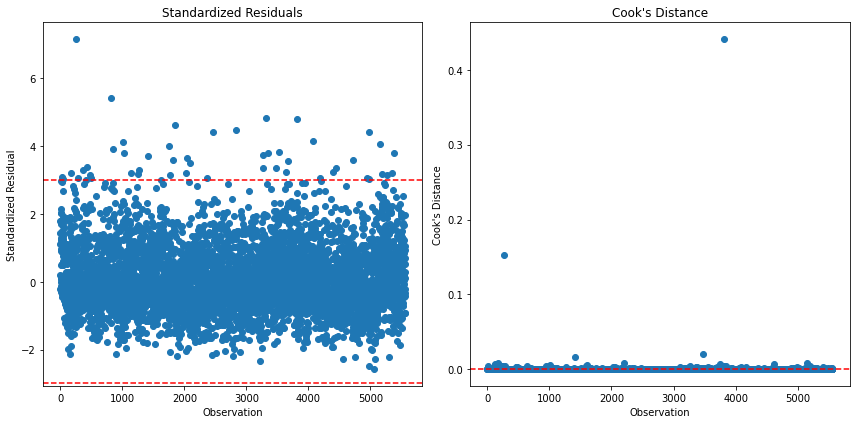

Quantity outliers (Standardized Residuals > 3): 49
Quantity influential Points (Cook's Distance > 4/n): 250
Selected alpha: 0.03
                 Generalized Linear Model Regression Results                  
Dep. Variable:            deaths_2022   No. Observations:                 5293
Model:                            GLM   Df Residuals:                     5271
Model Family:        NegativeBinomial   Df Model:                           21
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9964.4
Date:                Wed, 19 Jun 2024   Deviance:                       4155.8
Time:                        00:10:05   Pearson chi2:                 4.28e+03
No. Iterations:                    12   Pseudo R-squ. (CS):             0.6673
Covariance Type:            nonrobust                                         
                                                                 coef    std err 

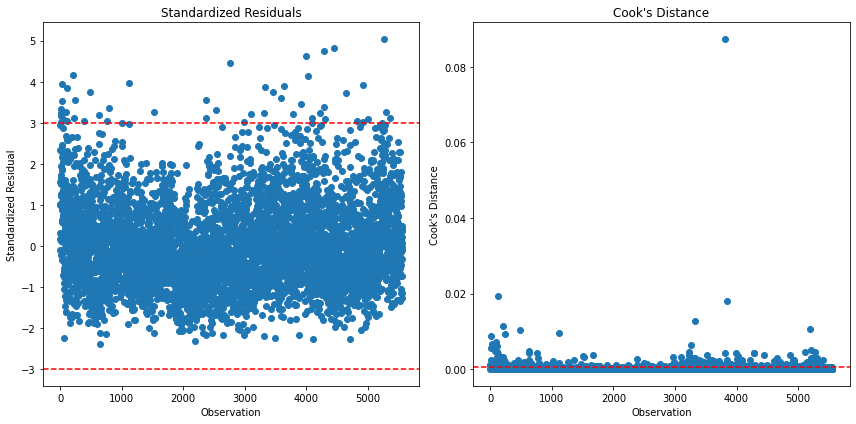

Quantity outliers (Standardized Residuals > 3): 51
Quantity influential Points (Cook's Distance > 4/n): 289
Selected alpha: 0.05
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 deaths   No. Observations:                 5270
Model:                            GLM   Df Residuals:                     5248
Model Family:        NegativeBinomial   Df Model:                           21
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19439.
Date:                Wed, 19 Jun 2024   Deviance:                       5644.6
Time:                        00:14:40   Pearson chi2:                 5.47e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.7267
Covariance Type:            nonrobust                                         
                                                                 coef    std err 

In [14]:
list_columns_y = ['deaths_accumulated_first_semester_2020', 'deaths_accumulated_2020', 'deaths_2021', 'deaths_2022', 'deaths']
list_periods = ['2020_1','2020', '2021', '2022', '2020_2022']
list_delta_first_death_columns = ['delta_first_death_2020-06-30', 'delta_first_death_2020-12-31', 'delta_first_death_2021-12-31', 'delta_first_death_2022-12-31', 'delta_first_death_general_period']

for i in range(len(list_periods)):
    column_y = list_columns_y[i]
    period = list_periods[i]
    column_delta_first_death = list_delta_first_death_columns[i]
    print('\n*** Period: ', period)
        
    y = df_y[column_y]
       
    # # Model 2      
    # print('\*** Model 2')
    # print('===>Full model:')
    # with open('models/model_2_'+period+'.pkl', 'rb') as file:
    #     model = pickle.load(file)
    # summarize_results(model)
    # outliers, influential_points, cooks_d, standardized_residuals = outlier_analysis(model)
    # 
    # x = df_cluster_labels.copy()
    # x = pd.get_dummies(x, columns=['cluster_label'], drop_first=True, dtype=int)
    # x = x.sort_index()        
    # x = pd.concat([x,df_variables], axis=1)    
    # scaler = StandardScaler()
    # delta_standardized = scaler.fit_transform(df_y[[column_delta_first_death]])
    # x['delta_first_death_period'] = delta_standardized[:,0]
    # x = sm.add_constant(x)
    # 
    # positions_to_remove = list(set(np.concatenate([outliers, influential_points])))
    # indices_to_remove = x.iloc[positions_to_remove].index
    # x_without_outliers = x.drop(indices_to_remove)
    # y_without_outliers = y.drop(indices_to_remove)
    # list_offset_without_outliers = list_offset.drop(indices_to_remove)
    # 
    # model = tunning_negative_binomial_model(x_without_outliers,y_without_outliers,list_offset_without_outliers)        
    # filename = 'model_2_'+period
    # save_model(model,filename,'models/sensitivity_analysis/outliers')
    # summarize_results(model)
    # 
    # # Model 3    
    # print('\*** Model 3')
    # print('===>Full model:')
    # with open('models/model_3_'+period+'.pkl', 'rb') as file:
    #     model = pickle.load(file)
    # summarize_results(model)
    # outliers, influential_points, cooks_d, standardized_residuals = outlier_analysis(model)    
    # 
    # x = df_cluster_probabilities.copy()
    # x['delta_first_death_period'] = df_y[column_delta_first_death]
    # scaler = StandardScaler()
    # x_standardized = scaler.fit_transform(x)
    # x = pd.DataFrame(x_standardized, index=x.index, columns=x.columns)  
    # x = sm.add_constant(x)
    # 
    # positions_to_remove = list(set(np.concatenate([outliers, influential_points])))
    # indices_to_remove = x.iloc[positions_to_remove].index
    # x_without_outliers = x.drop(indices_to_remove)
    # y_without_outliers = y.drop(indices_to_remove)
    # list_offset_without_outliers = list_offset.drop(indices_to_remove)
    # 
    # model = tunning_negative_binomial_model(x_without_outliers,y_without_outliers,list_offset_without_outliers)        
    # filename = 'model_3_'+period
    # save_model(model,filename,'models/sensitivity_analysis/outliers')
    # summarize_results(model)
    
    # Model 5  
    print('\*** Model 5')
    print('===>Full model:')
    with open('models/model_5_'+period+'.pkl', 'rb') as file:
        model = pickle.load(file)
    summarize_results(model)
    outliers, influential_points, cooks_d, standardized_residuals = outlier_analysis(model)
    
    x = df_cluster_probabilities.copy()
    x['delta_first_death_period'] = df_y[column_delta_first_death]
    scaler = StandardScaler()
    x_standardized = scaler.fit_transform(x)
    x = pd.DataFrame(x_standardized, index=x.index, columns=x.columns)  
    x = pd.concat([x,df_variables], axis=1)
    x = sm.add_constant(x)
    
    positions_to_remove = list(set(np.concatenate([outliers, influential_points])))
    indices_to_remove = x.iloc[positions_to_remove].index
    x_without_outliers = x.drop(indices_to_remove)
    y_without_outliers = y.drop(indices_to_remove)
    list_offset_without_outliers = list_offset.drop(indices_to_remove)

    model = tunning_negative_binomial_model(x_without_outliers,y_without_outliers,list_offset_without_outliers)        
    filename = 'model_5_'+period
    save_model(model,filename,'models/sensitivity_analysis/outliers')
    summarize_results(model)    